In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets

In [2]:
hr=pd.read_csv("/HR_comma_sep.csv")

In [3]:
hr.head

<bound method NDFrame.head of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.10             0.77               6   
3                    0.92             0.85               5   
4                    0.89             1.00               5   
...                   ...              ...             ...   
14990                0.40             0.57               2   
14991                0.37             0.48               2   
14992                0.37             0.53               2   
14993                0.11             0.96               6   
14994                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       247                   4              0     1   
3                       259                   5              0     1   
4                       224                   5              0     1   
...                     ...                 ...            ...   ...   
14990                   151                   3              0     1   
14991                   160                   3              0     1   
14992                   143                   3              0     1   
14993                   280                   4              0     1   
14994                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales     low  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14990                      0    support     low  
14991                      0    support     low  
14992                      0    support     low  
14993                      0    support     low  
14994                      0    support     low  

[14995 rows x 10 columns]>

In [4]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [5]:
hr['left'].value_counts()

,count
left,
0,11428
1,3567


In [6]:
len(hr['Department'].unique())

10

In [ ]:
Binning tha data

In [28]:
bins=pd.IntervalIndex.from_tuples([(0,0.4),(0.4,0.6),(0.6,1)])
satisf_category=pd.cut(hr['satisfaction_level'],bins=bins)
satisf_category.value_counts(normalize=True)*100

,proportion
satisfaction_level,
"(0.6, 1.0]",55.145048
"(0.4, 0.6]",24.034678
"(0.0, 0.4]",20.820273


Melting the data

In [29]:
quality=pd.read_csv("/quality.csv")
quality

,Sno,A,B,C
0,1,97,93,99
1,2,73,14,94
2,3,93,93,87
3,4,100,55,66
4,5,23,77,59


In [30]:
qual_melt=pd.melt(quality,id_vars='Sno',var_name="Category",value_name="Score")
qual_melt

,Sno,Category,Score
0,1,A,97
1,2,A,73
2,3,A,93
3,4,A,100
4,5,A,23
5,1,B,93
6,2,B,14
7,3,B,93
8,4,B,55
9,5,B,77


In [32]:
pd.pivot_table(qual_melt , index='Sno' , columns='Category' , values='Score')

Category,A,B,C
Sno,,,
1,97.0,93.0,99.0
2,73.0,14.0,94.0
3,93.0,93.0,87.0
4,100.0,55.0,66.0
5,23.0,77.0,59.0


Concatenate Dataframes :  
Combining two dataframes

In [40]:
mum=pd.read_csv('/mum_members.csv')
delhi=pd.read_csv('/Delhi_members.csv')
pd.concat([mum , delhi] , axis=0 ,ignore_index=True)


,Name,Age,City
0,Raghav,32,Mumbai
1,Ganesh,45,Mumbai
2,Pallavi,31,Mumbai
3,Harpreet,45,Delhi
4,Nitin,21,Delhi
5,Jeevan,24,Delhi
6,Garima,34,Delhi


In [43]:
combine.loc[1]

NameError: name 'combine' is not defined

In [45]:
 aster=pd.read_csv('/Aster.csv')
 rose=pd.read_csv('/Rose.csv')

In [48]:
pd.concat([aster , rose] , axis='columns' , keys=['aster' , 'rose'])

aster            rose      
      Month Sales     Month Sales
0   January  17.5   January   7.8
1  February  21.8  February   3.5
2     March  24.5     March   5.9
3     April  25.1     April   6.8

## Merging the Dataframe

### Inner Joins

In [54]:
demog=pd.read_csv('/demo_age.csv')
rating=pd.read_csv('/Ratings.csv')
demog


,Name,Age
0,Nandan,33
1,Girish,31
2,Sonali,26
3,Sheetal,29


In [52]:
rating

,Name,Rating
0,Nandan,5
1,Kapil,6
2,Girish,8
3,Sonali,7


In [55]:
demog.merge(rating , on='Name' , how='inner')

,Name,Age,Rating
0,Nandan,33,5
1,Girish,31,8
2,Sonali,26,7


Outer Joins

In [57]:
demog.merge(rating , on='Name' , how='outer')

,Name,Age,Rating
0,Girish,31.0,8.0
1,Kapil,NaN,6.0
2,Nandan,33.0,5.0
3,Sheetal,29.0,NaN
4,Sonali,26.0,7.0


In [58]:
demog.merge(rating , on='Name' , how='right')

,Name,Age,Rating
0,Nandan,33.0,5
1,Kapil,NaN,6
2,Girish,31.0,8
3,Sonali,26.0,7


## Palying With the Dataset : Pizza

In [60]:
pizza=pd.read_csv('/pizzas.csv')
pizza_types=pd.read_csv('/pizza_types.csv' , encoding='unicode_escape')
order=pd.read_csv('/orders.csv')
order_details=pd.read_csv('/order_details.csv')


In [61]:
pizza

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75
...,...,...,...,...
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00


In [64]:
order_details['quantity'].unique()

array([1, 2, 3, 4])

In [81]:
sales_by_name.sort_values(ascending=False).head(5)

,amount
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25


In [75]:
pizza_info=pizza.merge(pizza_types , on='pizza_type_id' , how='left')
pizza_info=pizza.merge(pizza_type_mini , on='pizza_type_id')
pizza_ord_details=pizza_info.merge(order_details , on='pizza_id')
pizza_ord_details['amount']=pizza_ord_details['price']*pizza_ord_details['quantity']

<function matplotlib.pyplot.show(close=None, block=None)>

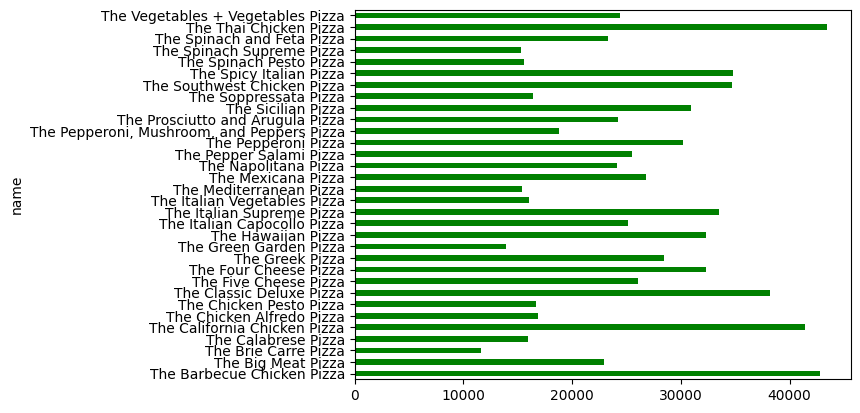

In [108]:
# Reconstruct pizza_ord_details to include the 'category' column
pizza_info = pizza.merge(pizza_types , on='pizza_type_id' , how='left')
pizza_ord_details = pizza_info.merge(order_details , on='pizza_id')
pizza_ord_details['amount']=pizza_ord_details['price']*pizza_ord_details['quantity']

sales_by_name=pizza_ord_details.groupby('name')['amount'].sum()
sales_by_name.plot(kind='barh' , color = 'green')
sales_by_category=pizza_ord_details.groupby('category')['amount'].sum()
plt.show

In [80]:
pizza_types.sort_values('name')

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
14,brie_carre,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
15,calabrese,The Calabrese Pizza,Supreme,"Nduja Salami, Pancetta, Tomatoes, Red Onions,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
23,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
24,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."


,amount
name,
The Thai Chicken Pizza,43434.25
The Barbecue Chicken Pizza,42768.00
The California Chicken Pizza,41409.50
The Classic Deluxe Pizza,38180.50
The Spicy Italian Pizza,34831.25


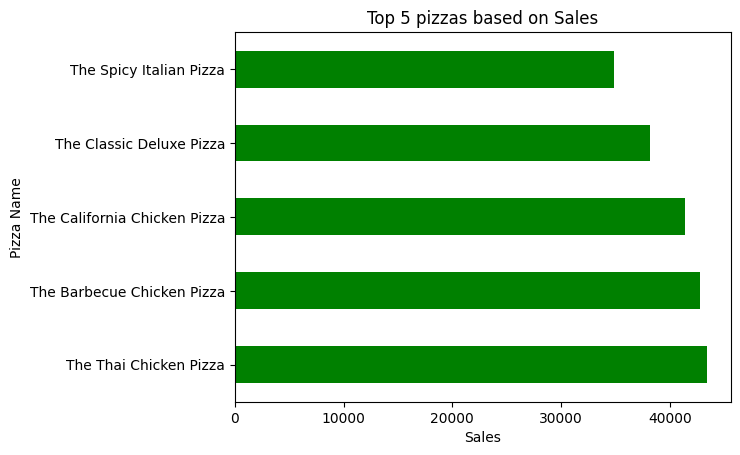

In [105]:
display(sales_by_name.sort_values(ascending=False).head(5))
sales_by_name.sort_values(ascending=False).head(5).plot(kind='barh' , color = 'green')
plt.title("Top 5 pizzas based on Sales")
plt.xlabel("Sales")
plt.ylabel("Pizza Name")
plt.show()

### Difference between iloc and loc

In [100]:
demog = pd.read_csv('/demo_age.csv' , index_col=0)
demog

,Age
Name,
Nandan,33
Girish,31
Sonali,26
Sheetal,29


In [101]:
demog.loc['Sonali']

,Sonali
Age,26


In [104]:
demog = pd.read_csv('/demo_age.csv')
demog.loc[2]

,2
Name,Sonali
Age,26


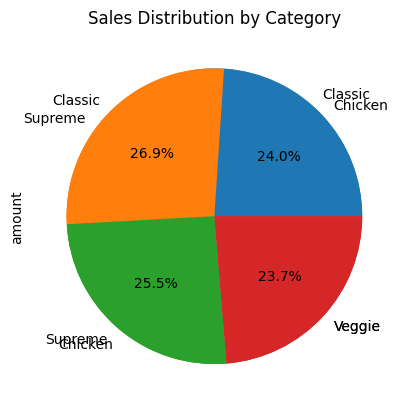

In [118]:
sales_by_category.sort_values(ascending=False).head(5).plot(kind='pie' , color = 'green')
plt.title('Sales Distribution by Category')
sales_by_category=pizza_ord_details.groupby('category')['amount'].sum()
sales_by_category.plot(kind='pie' , autopct='%1.1f%%')
plt.show()

## By Line Chart Monthly Sales

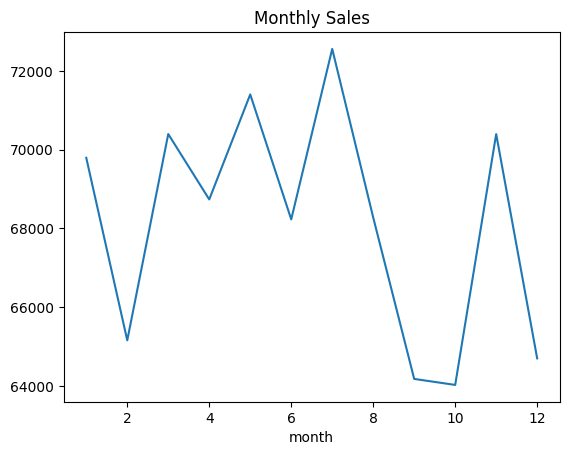

In [128]:
pizza_type_mini=pizza_types[['pizza_type_id','category','name']]
pizza_info=pizza.merge(pizza_type_mini , on='pizza_type_id')
order['date_time']=order['date']+' '+order['time']
order['date_time']=pd.to_datetime(order['date_time'])
order_info=order.merge(order_details , on='order_id')
order_info['year']=order_info['date_time'].dt.year
order_info['month']=order_info['date_time'].dt.month
pizza_ord_details=pizza_info.merge(order_info , on='pizza_id') # Changed merge to order_info
pizza_ord_details['amount']=pizza_ord_details['price']*pizza_ord_details['quantity']
monthly_sales=pizza_ord_details.groupby('month')['amount'].sum()

monthly_sales.plot(kind='line')
plt.title('Monthly Sales')
plt.show()

In [139]:
monthly_sales=pizza_ord_details.groupby('month')['amount'].sum()
monthly_sales=monthly_sales.reset_index()

## Monthly Sales By Category "Veggies" Visualizing using line chart

---



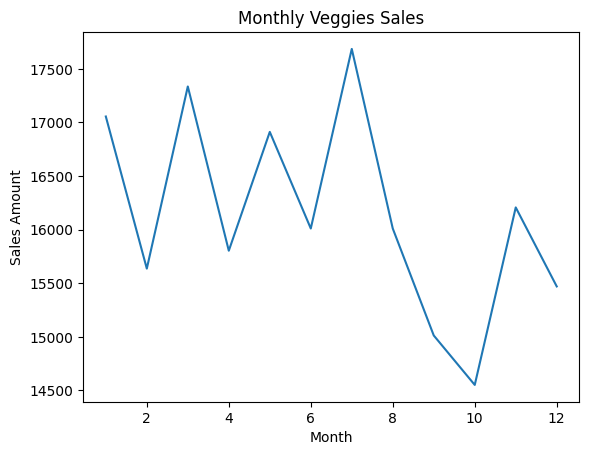

In [140]:
veggie_sales_details = pizza_ord_details[pizza_ord_details['category'] == 'Veggie']
monthly_veggie_sales = veggie_sales_details.groupby('month')['amount'].sum()
monthly_veggie_sales.plot(kind='line')
plt.title('Monthly Veggies Sales')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
plt.show()

## Monthly Sales by Category Wise using facetGrid

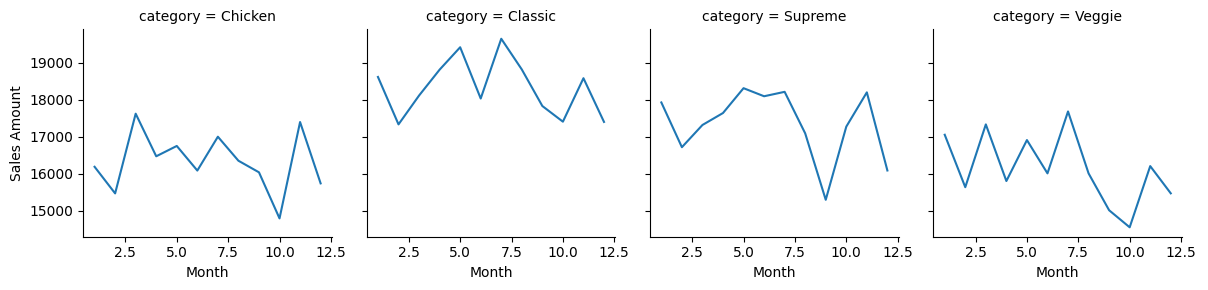

In [185]:
monthly_sales_by_category = pizza_ord_details.groupby(['month', 'category'])['amount'].sum().reset_index()
g = sns.FacetGrid(monthly_sales_by_category , col='category')
g.map(plt.plot,'month', 'amount')
g.set_axis_labels("Month", "Sales Amount")
g.add_legend()
plt.show()

## Per Category wise - Monthly Sales

In [159]:
def plot_monthly_sales_by_selected_category(selected_category):

  filtered_df = pizza_ord_details[pizza_ord_details['category'] == selected_category]

  monthly_sales = filtered_df.groupby('month')['amount'].sum().reset_index()

  plt.figure(figsize=(8, 6))
  plt.plot(monthly_sales['month'], monthly_sales['amount'])
  plt.title(f'Monthly Sales for {selected_category} Pizzas')
  plt.xlabel('Month')
  plt.ylabel('Sales Amount')
  plt.xticks(monthly_sales['month'])
  plt.show()

In [158]:
category_options = pizza_ord_details['category'].unique().tolist()
widgets.interact(plot_monthly_sales_by_selected_category, selected_category=category_options)

interactive(children=(Dropdown(description='selected_category', options=('Chicken', 'Classic', 'Supreme', 'Veg…

<function __main__.plot_monthly_sales_by_selected_category(selected_category)>

## Size - wise Sales

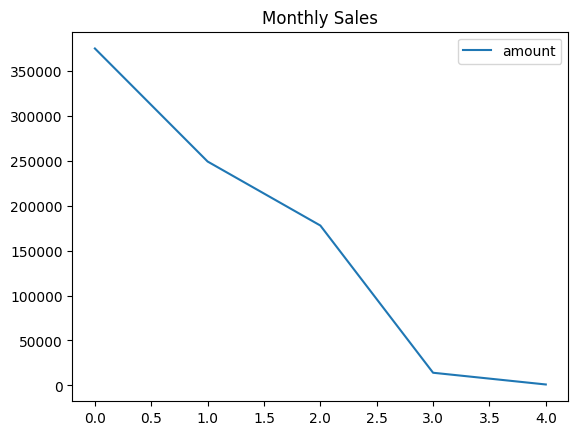

In [190]:
monthly_sales=pizza_ord_details.groupby('size')['amount'].sum()
monthly_sales.plot(kind='line')
plt.title('Monthly Sales')
plt.show()

## FacetGrid creates multiple small plots based on the categories in your data

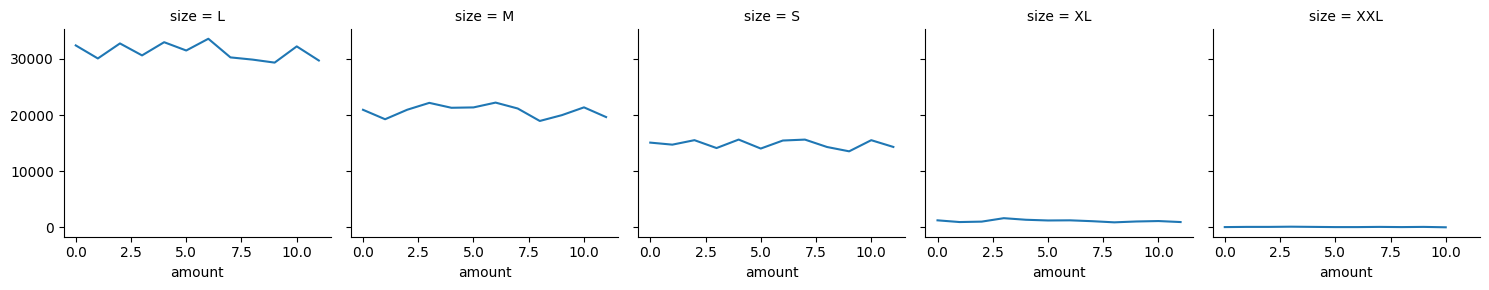

In [193]:
monthly_sales_by_size= pizza_ord_details.groupby(['month', 'size'])['amount'].sum().reset_index()
g = sns.FacetGrid(monthly_sales_by_size , col='size')
g.map(plt.plot,'amount')
# g.set_axis_labels("Month", "Sales Amount")
# g.add_legend()
plt.show()

Interactive widgets

In [212]:
def plot_monthly_sales_by_size(size):

  filtered_df = pizza_ord_details[pizza_ord_details['size'] == size]
  monthly_sales = filtered_df.groupby('month')['amount'].sum().reset_index()

  plt.figure(figsize=(8, 6))
  plt.plot(monthly_sales['month'], monthly_sales['amount'])
  plt.title(f'Monthly Sales for {size} Pizzas')
  plt.xlabel('Month')
  plt.ylabel('Sales Amount')
  plt.xticks(monthly_sales['month'])

In [213]:
size_options = pizza_ord_details['size'].unique().tolist()
widgets.interact(plot_monthly_sales_by_size, size=size_options)

interactive(children=(Dropdown(description='size', options=('S', 'M', 'L', 'XL', 'XXL'), value='S'), Output())…

<function __main__.plot_monthly_sales_by_size(size)>

## Box Plot across all categories in Seaborn

In [183]:
pizza_ord_details.columns

Index(['pizza_id', 'pizza_type_id', 'size', 'price', 'category', 'name',
       'order_id', 'date', 'time', 'date_time', 'order_details_id', 'quantity',
       'year', 'month', 'amount'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

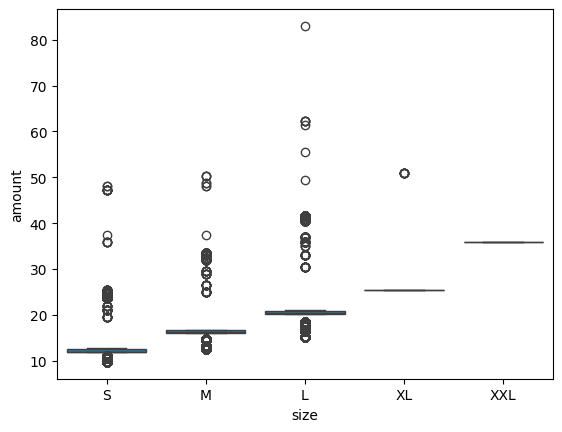

In [167]:
sns.boxplot(data=pizza_ord_details , x='size' , y='amount')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

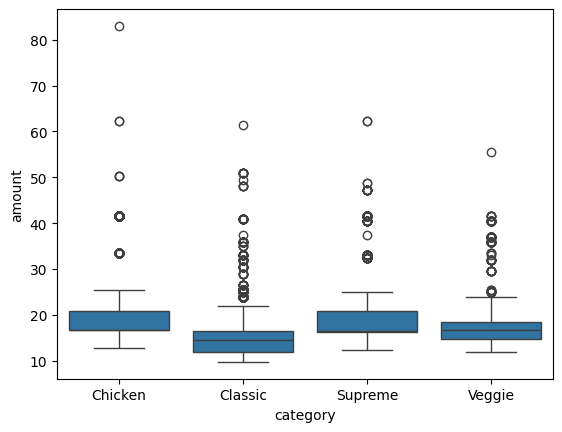

In [168]:
sns.boxplot(data=pizza_ord_details , x='category' , y='amount')
plt.show

## Interactive for boxplot

In [169]:
category_options = pizza_ord_details['category'].unique().tolist()
widgets.interact(plot_monthly_sales_by_selected_category, selected_category=category_options)

interactive(children=(Dropdown(description='selected_category', options=('Chicken', 'Classic', 'Supreme', 'Veg…

<function __main__.plot_monthly_sales_by_selected_category(selected_category)>

 ## IpyWidgets interactice

> Add blockquote



In [174]:
def boxplot_by_cat(category):
  pizza_cat = pizza_ord_details[pizza_ord_details['category']==category]
  sns.boxplot(data=pizza_cat , x='size' , y='amount')
  plt.title(f"{category} Sales")
  plt.show

In [175]:
widgets.interact(boxplot_by_cat , category=['Chicken' , 'Classic' , 'Supreme' , 'Veggie'])

interactive(children=(Dropdown(description='category', options=('Chicken', 'Classic', 'Supreme', 'Veggie'), va…

<function __main__.boxplot_by_cat(category)>

## FacetGrid BoxPlot Categorywise

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<function matplotlib.pyplot.show(close=None, block=None)>

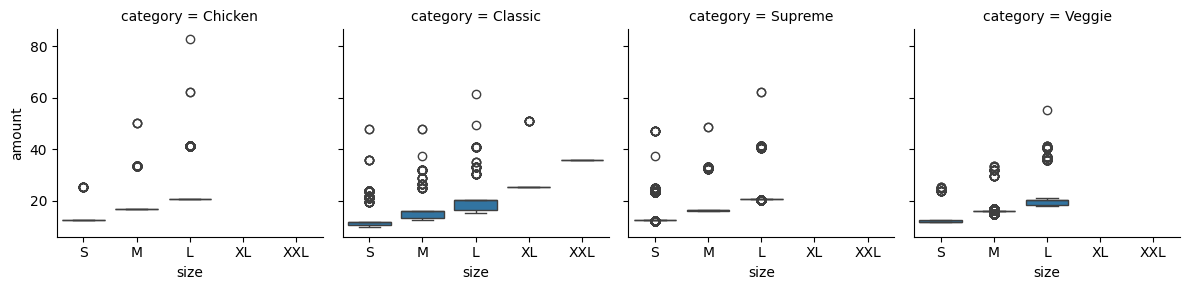

In [172]:
g=sns.FacetGrid(pizza_ord_details , col='category')
g.map(sns.boxplot , 'size' , 'amount')
plt.show

## Boxplot size - wise Sales

In [177]:
def boxplot_by_size(size):
  pizza_cat = pizza_ord_details[pizza_ord_details['size']==size]
  sns.boxplot(data=pizza_cat , x='category' , y='amount')
  plt.title(f"{size} Sales")
  plt.show

In [181]:
widgets.interact(boxplot_by_size , size=['S' , 'M' , 'L' , 'XL' , 'XXL'])

interactive(children=(Dropdown(description='size', options=('S', 'M', 'L', 'XL', 'XXL'), value='S'), Output())…

<function __main__.boxplot_by_size(size)>

## Frequency Count

In [218]:
pizza_type_mini = pizza_types[['pizza_type_id', 'ingredients']]
pizza_info=pizza.merge(pizza_type_mini , on='pizza_type_id')
pizza_ord_details=pizza_info.merge(order_details , on='pizza_id')
pizza_ord_details

,pizza_id,pizza_type_id,size,price,ingredients,order_details_id,order_id,quantity
0,bbq_ckn_s,bbq_ckn,S,12.75,"Barbecued Chicken, Red Peppers, Green Peppers,...",11,6,1
1,bbq_ckn_s,bbq_ckn,S,12.75,"Barbecued Chicken, Red Peppers, Green Peppers,...",239,102,1
2,bbq_ckn_s,bbq_ckn,S,12.75,"Barbecued Chicken, Red Peppers, Green Peppers,...",294,124,1
3,bbq_ckn_s,bbq_ckn,S,12.75,"Barbecued Chicken, Red Peppers, Green Peppers,...",458,194,1
4,bbq_ckn_s,bbq_ckn,S,12.75,"Barbecued Chicken, Red Peppers, Green Peppers,...",489,208,1
...,...,...,...,...,...,...,...,...
48615,veggie_veg_l,veggie_veg,L,20.25,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",48341,21230,1
48616,veggie_veg_l,veggie_veg,L,20.25,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",48452,21278,1
48617,veggie_veg_l,veggie_veg,L,20.25,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",48523,21305,1
48618,veggie_veg_l,veggie_veg,L,20.25,"Mushrooms, Tomatoes, Red Peppers, Green Pepper...",48548,21317,1


In [219]:
from mlxtend.preprocessing import TransactionEncoder

<function matplotlib.pyplot.show(close=None, block=None)>

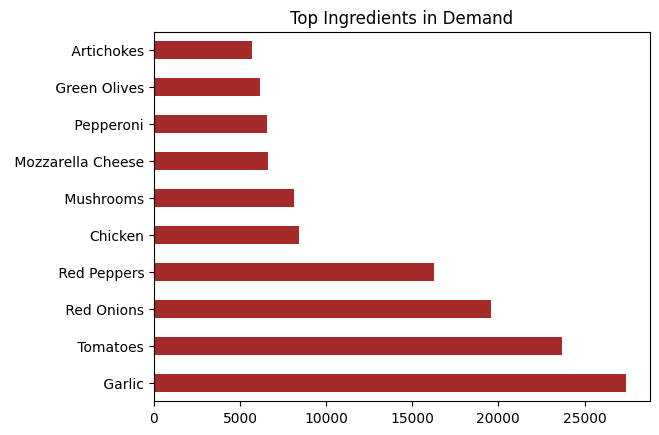

In [220]:
#### Ingredients
ingred_list = []
for i in pizza_ord_details['ingredients'].to_list():
  ingred_list.append(i.split(","))
te=TransactionEncoder()
te_ary=te.fit(ingred_list).transform(ingred_list)
df_ingredients = pd.DataFrame(te_ary , columns=te.columns_)
ingreds = df_ingredients.sum().sort_values(ascending=False).iloc[:10]
ingreds.plot(kind='barh' , color='brown')
plt.title("Top Ingredients in Demand")
plt.show